# How to use Mean Field Analytic Ising Model Package

In [1]:
include("MFIsingModelAnalytic.jl");
using .MFIsingAnalytic;

In this document we show how a user can get use analytic results for Ising model in the *mean field* setting. Each model consists on $N$ magentic spins all of which have a mean field interaction with one another. For each spin the change in the global Hamiltonian given that spin flips from $\sigma_i\to -\sigma_i$ is given by $\Delta H = 2\sigma_i(h + Jzm)$, where $h$ is the field strength affecting all agents, $J$ is the interaction strength from one agent to another and $z$ stores the details of the interactions. In the case where all spins are fully connected we set $z = 1$ and assume that each each spin has a $J/N$ interaction strength with each other agent. In the nearest neighbour interaction case one would set $z = 2d$, where $d$ is the spatial dimension.

We define the analytic Ising model (AIM) `struct` below.

In [155]:
N = 100; h=0.1; J = 50.0; #h=0.01
im1 = AIM(h = h, J = J, N = N);

We can then access certain field of the `struct`, for example the field strength.

In [156]:
im1.h

0.1

Using the `prob(AIM, t, ic)` function we can then output the probability distributions for the model given the AIM at a time $t$ for an initial condition `ic`, below we do this for three different times. If we don't specify the starting condition, then is assumed that the system has an initial condition with $N/2$ up spins, or else setting `ic=m::Int64` will have an initial condition starting from $m$ up spins.

In [157]:
p1 = [prob(im1, 0.1), prob(im1, 1.0), prob(im1, 1E4), prob(im1,1E10)];

One can then plot the probability distributions below 

In [158]:
using Plots, LaTeXStrings

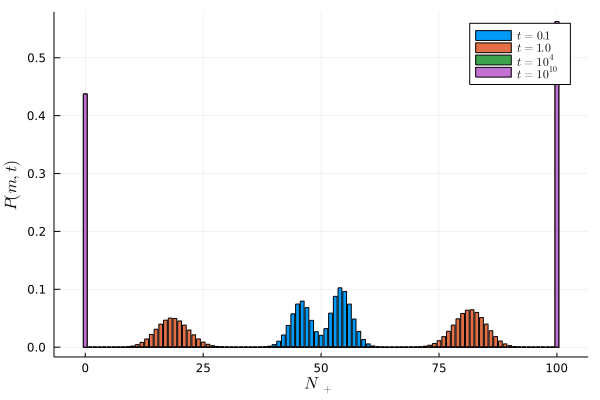

In [159]:
bar(p1, label = [L"t = 0.1" L"t = 1.0" L"t = 10^4" L"t = 10^{10}"])
xlabel!(L"$N_+$")
ylabel!(L"$P(m,t)$")

We can also check that the sum of the probabilities sums to 1 (or very close to 1) for each distribution. 

In [160]:
sum(p1[1][2])

0.9999999999999554325810971295371543736881679803164988157636157524085170709083294

Oftentimes, the initial condition of the number of up spins is not exactly known and is itself a probability distribution. For example, a common initial condition is that each spin start as spin up with probability $p_0 = 0.5$; in which case there is an initial binomial distribution over the number of up spins. We can specify initial distributions when specifying `ic` in `prob()`.

In [161]:
using Distributions

In [162]:
p2 = prob(im1, 4.8, Binomial(N,0.5));

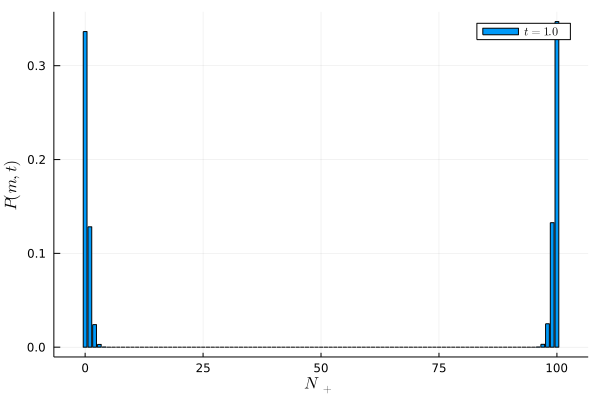

In [163]:
bar(p2, label = L"t = 1.0")
xlabel!(L"$N_+$")
ylabel!(L"$P(m,t)$")

Again check the normalisation.

In [164]:
sum(p2[2])

0.999999999999946128106914850344592077169522800216575287144076159594052972701019

Finally, we can output the steady state distribution for an Ising model through `SSprob(AIM)`. No initial condition needs to be specified here since this is the *steady state* distribution reached as $t\to \infty$ and is hence independent of the initial condition. 

In [165]:
ps1 = SSprob(im1);

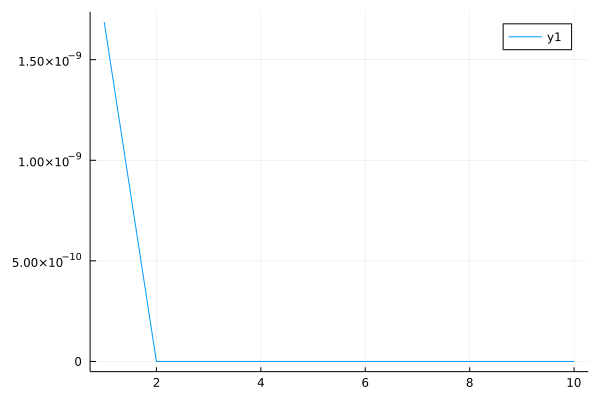

In [166]:
plot((1:10,ps1[2][1:10]))

In [167]:
min = findmin(ps1[2][1:100])[2];
sum(ps1[2][1:min])
sum(ps1[2][min+1:N+1])

0.9999999983124701453395289686700542472037470732536056025116344279704073406678223

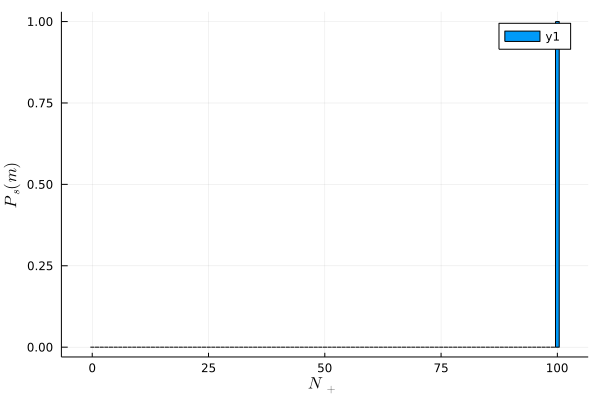

In [168]:
bar(ps1)
xlabel!(L"$N_+$")
ylabel!(L"$P_s(m)$")

And a final check of normalisation.

In [169]:
sum(ps1[2])

1.0

# Fixation times

In [189]:
bs = im1.As[2:N]; # runs from b[1]->b[N-1]
ds = im1.Bs[1:N-1]; # runs from d[1]->d[N-1]
γs = [ds[i]/bs[i] for i in 1:N-1]

99-element Vector{BigFloat}:
 3.008604741021784988885553407206330695972890432953197540987769588548379538813777e+40
 8.226503490315654405856239267656221844635439806633441448903919159584949380209098e+39
 1.687220808727848017375296045125247681011680705346475113247984625905095114796863e+39
 3.076254039596296188717480816416070857069128867301934991965993228451851922310419e+38
 5.258851095872067242473753944654562890370104676232262381585316275677802924301664e+37
 8.631353584226381192179055948415078462082309394163727882615084342181081210158643e+36
 1.377468381326347897344655921011879092514895977865768311448385051375848305644939e+36
 2.153672899239007769721263312225721153484590803439070636054748395264033218238417e+35
 3.315047356386169441098692203605160606255847500361278617435433785028530590609581e+34
 5.040308819216899440060218123830573761610374989552354190596853644742430461476252e+33
 7.587756240811559035557281877505654342891793408290435500811997082348344933919937e+32
 1.1329749354331499682051

In [171]:
ϕ₁ = (1 + sum([prod([γs[j] for j in 1:k]) for k in 1:N-1]))^-1 # prob of fixation at N given starting i=1.

4.140874643355900506361331853699582131569076941270046600375464742987966958795612e-1032

In [172]:
ϕᵢ = [ϕ₁*(1 + sum([prod([γs[j] for j in 1:k]) for k in 1:i-1])) for i in 2:N-1];
prepend!(ϕᵢ, ϕ₁);

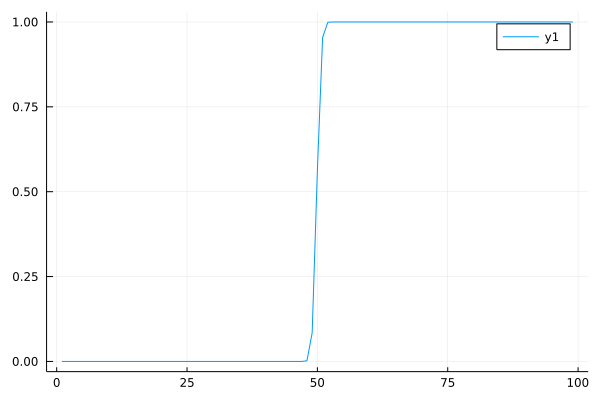

In [173]:
plot(ϕᵢ)

In [188]:
t1a = ϕ₁*sum([1/bs[k] for k in 1:N-1]);
t1b = ϕ₁*sum([sum([(1/bs[l])*prod(γs[l+1:k]) for l in 1:k-1]) for k in 2:N-1]);
t₁ = t1a+t1b

BigFloat

In [176]:
tia = -t₁*[sum([prod(γs[1:k]) for k in i:N-1]) for i in 2:N-1];
tib = [sum([1/bs[k] for k in i:N-1]) for i in 2:N-1];
tic = [sum([sum([(1/bs[l])*prod(γs[l+1:k]) for l in 1:k-1]) for k in i:N-1]) for i in 2:N-1];
tᵢ = (tia + tib + tic);
prepend!(tᵢ,t₁);

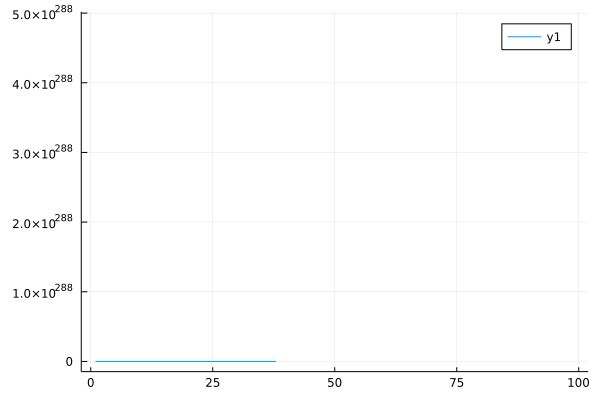

In [177]:
plot(tᵢ) # symmetric so good. reverse(tᵢ)])

In [182]:
tᵢ

99-element Vector{BigFloat}:
 1.000000000000000000000000000000000000000016618999271741809465418270612320054365
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 6.325070415853456823515479584966165845298645305129441198653167438357198111499855e+321
 4.872657005699999540176691193937594155438113428797503763433953228606474345383213e+288
 4.69219801800293764373197355969328553831984974596843971042368711922664472663702e+254
 1.129605583483286998779643536881851145340541564740631009873360772345077532144479e+220
 1.019784946208192829484009356580739764472818786035901292542932745344774834932836e+185
 5.114672824837721671895608901293123675338503196942288733567642762650209056882304e+148
 3.607361407140607838038242196668421674049048395123179321406398932273473062576039e+111
 4.2404329554681223909999140017830044379859613525014854994918548831022874624e+73
 8.3076749736557242056487941267521536e+34
 1.8333587646484375
 1.500000000000000000000000000000000000000038304493522318874633700148159229

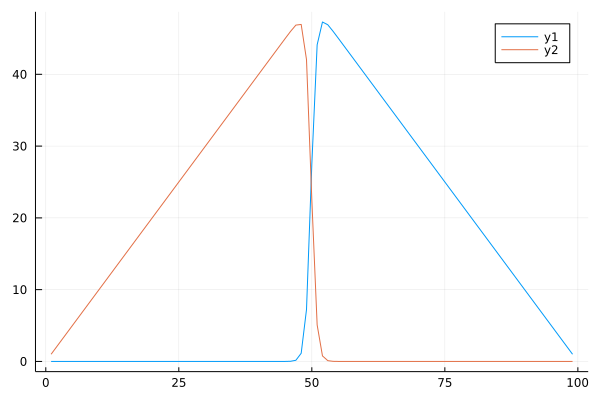

In [178]:
plot([bs,ds])

In [183]:
sum([1/bs[i] for i in 50:99])

4.518203759007568384318757426868576050011891013207030603236650203522547962279728

In [184]:
sum([1/ds[i] for i in 1:50])

4.527547651513257856078476888027896732392297851962945497815285186200138818568858

In [185]:
tᵢ[50]

9.205688158900309324517037904998116848596328322895680688872308051950952974585589e+953